In [28]:
from UTILITY_quickstart import *
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
import numpy as np
from UTILITY_setLattice import setLattice, getBendkG, getQuadkG, getSextkG, setBendkG, setQuadkG, setSextkG, setXOffset, setYOffset


#importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline2.yml")
importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline.yml") #This is older but using it to maintain consistency with these slides: https://docs.google.com/presentation/d/1duL8vxZtLYuoekD1mdSnYiVd3wfPsGMSYLjAAmwwFHM/edit?slide=id.g333ecbf07cd_0_79#slide=id.g333ecbf07cd_0_79

tao = initializeTao(
    inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"],   
    csrTF = True,
    numMacroParticles=1e5,
    scratchPath = "/tmp",
    randomizeFileNames = True
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 100000.0
Beam created, written to /tmp/beams/activeBeamFile_11475936014282823148.h5, and reinit to tao


In [29]:
setLattice(tao, **importedDefaultSettings)
trackBeam(tao, trackEnd = "ENDBC14E", **importedDefaultSettings)

In [30]:
PInit = getBeamAtElement(tao, "ENDBC14E") #This is downstream of the last bend but upstream of the EPICS quad Q14891
makeBeamActiveBeamFile(PInit, tao = tao) 

## Golden lattice

In [31]:
tao.cmd("set ele TCY15280 VOLTAGE = 0")
trackBeam(tao, trackStart = "ENDBC14E", trackEnd = "PR15944", **importedDefaultSettings)
POff = getBeamAtElement(tao, "PR15944")
#POff.write("/Users/nmajik/Golden_POff.h5")

tao.cmd("set ele TCY15280 VOLTAGE = 20e6")
trackBeam(tao, trackStart = "ENDBC14E", trackEnd = "PR15944", **importedDefaultSettings)
POn = getBeamAtElement(tao, "PR15944")

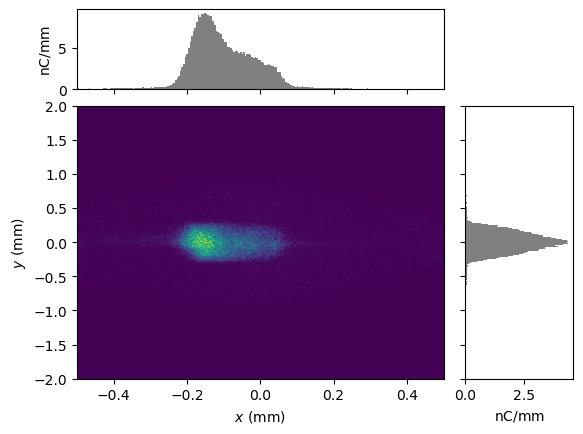

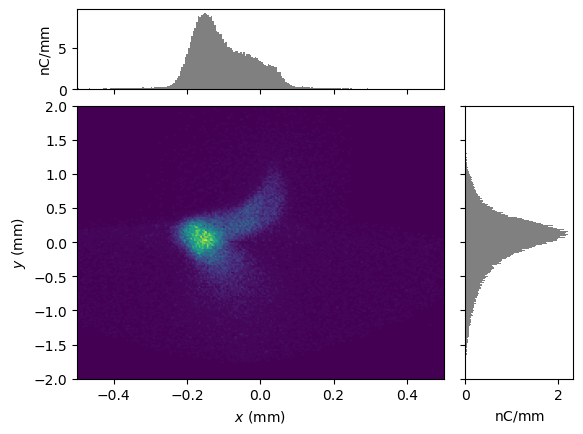

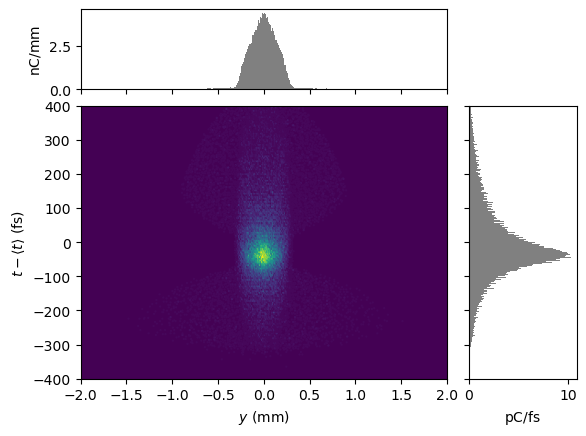

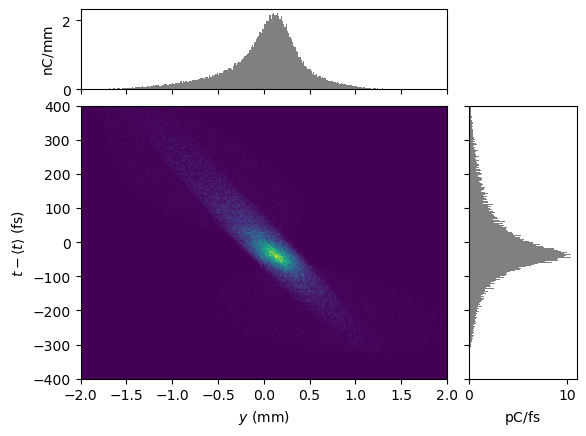

145.8543855776308
466.97297280250643
3.2016382020543404


In [32]:
display(plotMod(POff, 'x', 'y', bins=300, xlim = (-0.5e-3, 0.5e-3), ylim = (-2e-3,  2e-3) ))
display(plotMod(POn, 'x', 'y', bins=300,  xlim = (-0.5e-3, 0.5e-3), ylim = (-2e-3,  2e-3)))

display(plotMod(POff, 'y', 'delta_t', bins=300, xlim = (-2e-3,  2e-3), ylim = (-400e-15, 400e-15) ))
display(plotMod(POn, 'y', 'delta_t',  bins=300, xlim = (-2e-3,  2e-3), ylim = (-400e-15, 400e-15) ))


plt.clf()

print(1e6 * smallestIntervalImpliedSigma(POff.y))
print(1e6 * smallestIntervalImpliedSigma(POn.y))
print(smallestIntervalImpliedSigma(POn.y) / smallestIntervalImpliedSigma(POff.y))

## Analytic optimization settings: EPICS only

In [33]:
setQuadkG(tao, "QM14891", 40.86127902)
setQuadkG(tao, "Q14901",  -61.96312585)

In [34]:
tao.cmd("set ele TCY15280 VOLTAGE = 0")
trackBeam(tao, trackStart = "ENDBC14E", trackEnd = "PR15944", **importedDefaultSettings)
POff = getBeamAtElement(tao, "PR15944")
#POff.write("/Users/nmajik/Golden_POff.h5")

tao.cmd("set ele TCY15280 VOLTAGE = 20e6")
trackBeam(tao, trackStart = "ENDBC14E", trackEnd = "PR15944", **importedDefaultSettings)
POn = getBeamAtElement(tao, "PR15944")

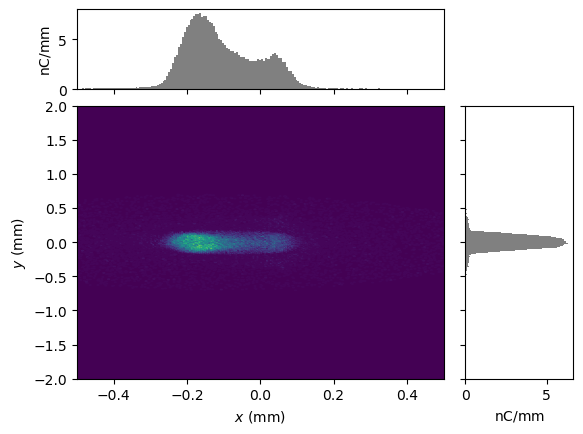

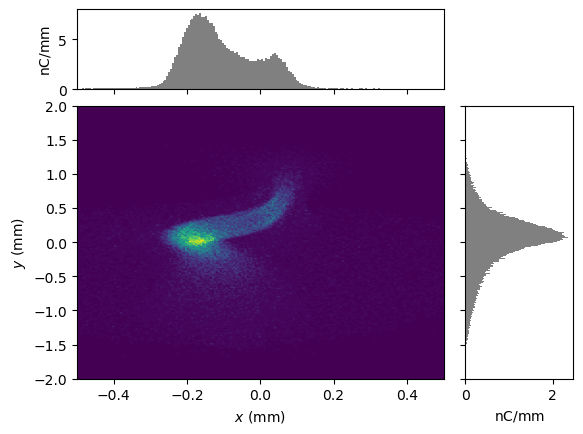

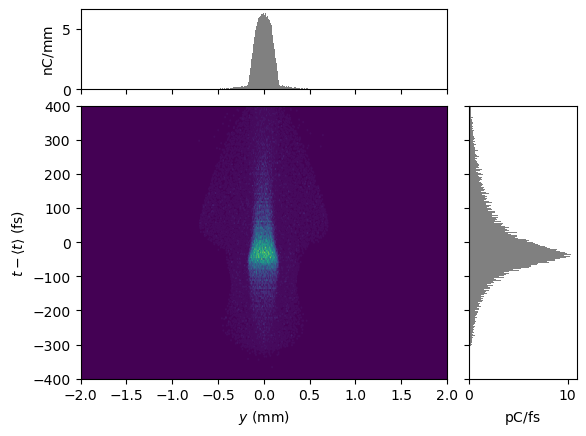

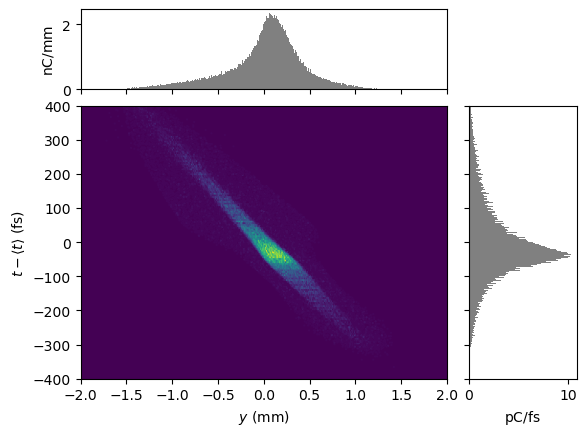

92.02665814657773
461.0521424085429
5.0099846250440905


In [35]:
display(plotMod(POff, 'x', 'y', bins=300, xlim = (-0.5e-3, 0.5e-3), ylim = (-2e-3,  2e-3) ))
display(plotMod(POn, 'x', 'y', bins=300,  xlim = (-0.5e-3, 0.5e-3), ylim = (-2e-3,  2e-3)))

display(plotMod(POff, 'y', 'delta_t', bins=300, xlim = (-2e-3,  2e-3), ylim = (-400e-15, 400e-15) ))
display(plotMod(POn, 'y', 'delta_t',  bins=300, xlim = (-2e-3,  2e-3), ylim = (-400e-15, 400e-15) ))


plt.clf()

print(1e6 * smallestIntervalImpliedSigma(POff.y))
print(1e6 * smallestIntervalImpliedSigma(POn.y))
print(smallestIntervalImpliedSigma(POn.y) / smallestIntervalImpliedSigma(POff.y))

## Analytic optimization settings: All quads

In [36]:
setQuadkG(tao, "QM14891", 62)
setQuadkG(tao, "Q14901",  0)

setQuadkG(tao, "Q15201",  15.5479)
setQuadkG(tao, "Q15301",  -13.7335)
setQuadkG(tao, "Q15401",  12.1293)
setQuadkG(tao, "Q15501",  -7.171)
setQuadkG(tao, "Q15601",  9.317113)
setQuadkG(tao, "Q15701",  -11.865)
setQuadkG(tao, "Q15801",  15.01879)
setQuadkG(tao, "Q15901",  -15.5939)


In [37]:
tao.cmd("set ele TCY15280 VOLTAGE = 0")
trackBeam(tao, trackStart = "ENDBC14E", trackEnd = "PR15944", **importedDefaultSettings)
POff = getBeamAtElement(tao, "PR15944")
POff.write("/Users/nmajik/Golden_POff.h5")

tao.cmd("set ele TCY15280 VOLTAGE = 20e6")
trackBeam(tao, trackStart = "ENDBC14E", trackEnd = "PR15944", **importedDefaultSettings)
POn = getBeamAtElement(tao, "PR15944")

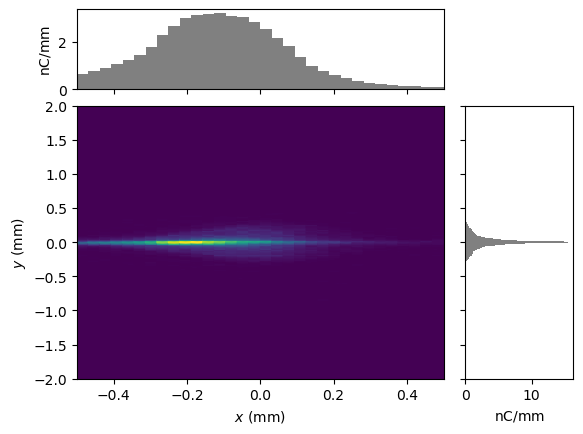

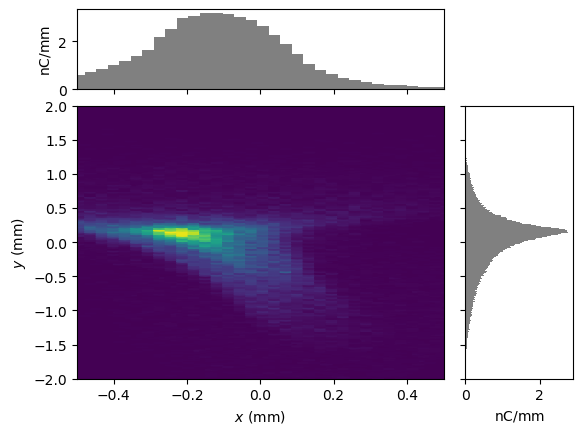

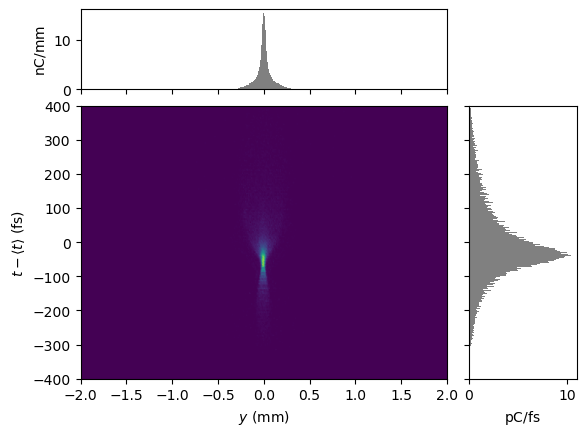

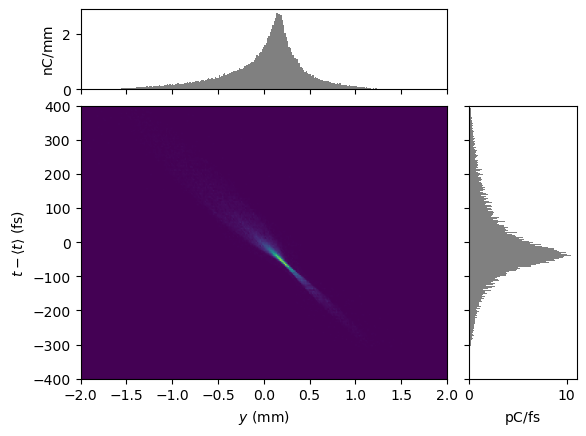

108.86360502363588
482.3730218883345
4.430985192742829


In [38]:
display(plotMod(POff, 'x', 'y', bins=300, xlim = (-0.5e-3, 0.5e-3), ylim = (-2e-3,  2e-3) ))
display(plotMod(POn, 'x', 'y', bins=300,  xlim = (-0.5e-3, 0.5e-3), ylim = (-2e-3,  2e-3)))

display(plotMod(POff, 'y', 'delta_t', bins=300, xlim = (-2e-3,  2e-3), ylim = (-400e-15, 400e-15) ))
display(plotMod(POn, 'y', 'delta_t',  bins=300, xlim = (-2e-3,  2e-3), ylim = (-400e-15, 400e-15) ))


plt.clf()

print(1e6 * smallestIntervalImpliedSigma(POff.y))
print(1e6 * smallestIntervalImpliedSigma(POn.y))
print(smallestIntervalImpliedSigma(POn.y) / smallestIntervalImpliedSigma(POff.y))

In [39]:
POn.charge

1.5993600000000006e-09

## Full tracking optimized: All quads

In [40]:
setQuadkG(tao, "QM14891", 28.7587)
setQuadkG(tao, "Q14901",  -19.602)

setQuadkG(tao, "Q15201",  15.516)
setQuadkG(tao, "Q15301", -13.20)
setQuadkG(tao, "Q15401",  11.6321)
setQuadkG(tao, "Q15501",  -7.864)
setQuadkG(tao, "Q15601",  10.6835)
setQuadkG(tao, "Q15701",  -11.723)
setQuadkG(tao, "Q15801",  15.286)
setQuadkG(tao, "Q15901",  -17.215)

In [41]:
tao.cmd("set ele TCY15280 VOLTAGE = 0")
trackBeam(tao, trackStart = "ENDBC14E", trackEnd = "PR15944", **importedDefaultSettings)
POff = getBeamAtElement(tao, "PR15944")
POff.write("/Users/nmajik/Golden_POff.h5")

tao.cmd("set ele TCY15280 VOLTAGE = 20e6")
trackBeam(tao, trackStart = "ENDBC14E", trackEnd = "PR15944", **importedDefaultSettings)
POn = getBeamAtElement(tao, "PR15944")

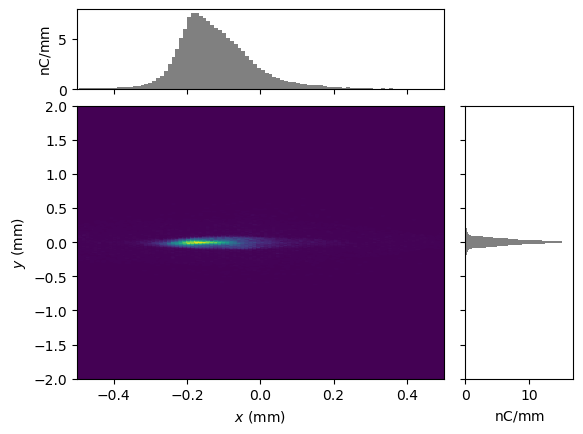

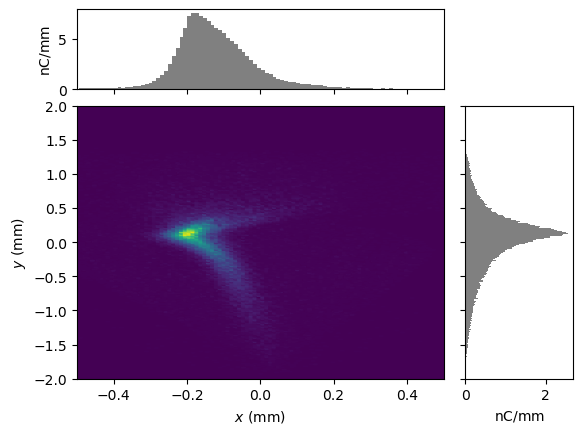

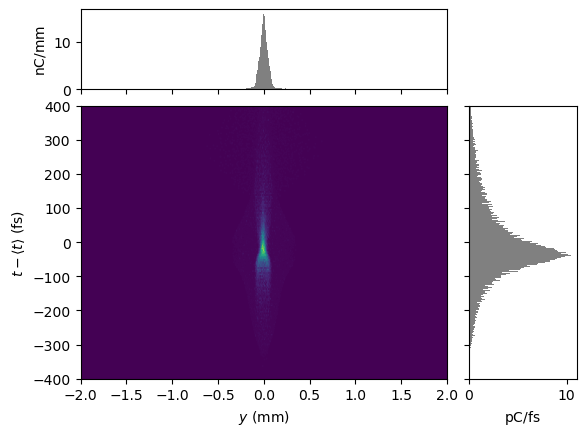

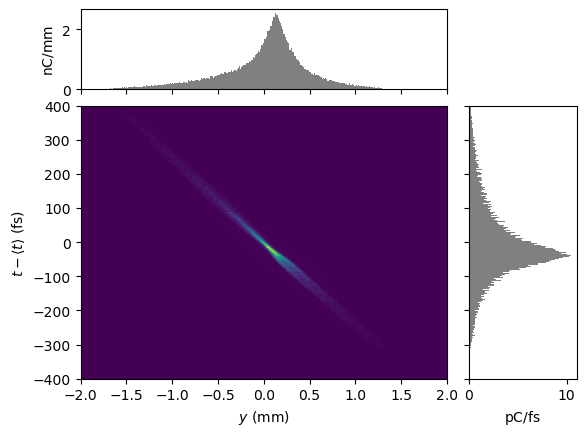

50.16944862866673
516.7580105354164
10.300252936009782


In [42]:
display(plotMod(POff, 'x', 'y', bins=300, xlim = (-0.5e-3, 0.5e-3), ylim = (-2e-3,  2e-3) ))
display(plotMod(POn, 'x', 'y', bins=300,  xlim = (-0.5e-3, 0.5e-3), ylim = (-2e-3,  2e-3)))

display(plotMod(POff, 'y', 'delta_t', bins=300, xlim = (-2e-3,  2e-3), ylim = (-400e-15, 400e-15) ))
display(plotMod(POn, 'y', 'delta_t',  bins=300, xlim = (-2e-3,  2e-3), ylim = (-400e-15, 400e-15) ))


plt.clf()

print(1e6 * smallestIntervalImpliedSigma(POff.y))
print(1e6 * smallestIntervalImpliedSigma(POn.y))
print(smallestIntervalImpliedSigma(POn.y) / smallestIntervalImpliedSigma(POff.y))

In [ ]:
POn.charge

In [47]:
tao.cmd("set ele TCY15280 VOLTAGE = 0")
trackBeam(tao, trackStart = "ENDBC14E", trackEnd = "PR15944", **importedDefaultSettings)
POff = getBeamAtElement(tao, "PR15944")
POff.write("/Users/nmajik/POff.h5")

tao.cmd("set ele TCY15280 PHI0 = 0")
tao.cmd("set ele TCY15280 VOLTAGE = 20e6")
trackBeam(tao, trackStart = "ENDBC14E", trackEnd = "PR15944", **importedDefaultSettings)
POn = getBeamAtElement(tao, "PR15944")
POn.write("/Users/nmajik/PPlus.h5")

tao.cmd("set ele TCY15280 PHI0 = 0.5")
trackBeam(tao, trackStart = "ENDBC14E", trackEnd = "PR15944", **importedDefaultSettings)
POn = getBeamAtElement(tao, "PR15944")
POn.write("/Users/nmajik/PMinus.h5")

## Optimize

In [13]:
#importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline2.yml")
importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline.yml") #This is older but using it to maintain consistency with these slides: https://docs.google.com/presentation/d/1duL8vxZtLYuoekD1mdSnYiVd3wfPsGMSYLjAAmwwFHM/edit?slide=id.g333ecbf07cd_0_79#slide=id.g333ecbf07cd_0_79

tao = initializeTao(
    inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"],   
    csrTF = True,
    numMacroParticles=1e4,
    scratchPath = "/tmp",
    randomizeFileNames = True
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 10000.0
Beam created, written to /tmp/beams/activeBeamFile_10952425610276672001.h5, and reinit to tao


In [14]:
setLattice(tao, **importedDefaultSettings)

In [15]:
#PInit = getBeamAtElement(tao, "ENDBC14E") #This is downstream of the last bend but upstream of the EPICS quad Q14891
makeBeamActiveBeamFile(PInit, tao = tao) 

In [16]:
print( getQuadkG(tao, "Q15201") ) #BACT = 14.5
print( getQuadkG(tao, "Q15301") ) #BACT = -14.1
print( getQuadkG(tao, "Q15401") ) #BACT = 11.3
print( getQuadkG(tao, "Q15501") ) #BACT = -8.2
print( getQuadkG(tao, "Q15601") ) #BACT = 10.6
print( getQuadkG(tao, "Q15701") ) #BACT = -12.5
print( getQuadkG(tao, "Q15801") ) #BACT = 15.9
print( getQuadkG(tao, "Q15901") ) #BACT = -16.1

14.120265899718168
-14.097001957879076
11.072088611169711
-7.959299716118455
10.108412751925345
-11.838880126921653
15.439262303434868
-16.03567744827067


In [23]:
def objective( params, tao ):
    QM14891kG, Q14901kG, Q15201kG, Q15301kG, Q15401kG, Q15501kG, Q15601kG, Q15701kG, Q15801kG, Q15901kG  = params
    
    try:
        #Prevent recalculation until changes are made
        tao.cmd("set global lattice_calc_on = F")
        
        setQuadkG(tao, "QM14891", QM14891kG)
        setQuadkG(tao, "Q14901", Q14901kG)
        
        setQuadkG(tao, "Q15201", Q15201kG)
        setQuadkG(tao, "Q15301", Q15301kG)
        setQuadkG(tao, "Q15401", Q15401kG)
        setQuadkG(tao, "Q15501", Q15501kG)
        setQuadkG(tao, "Q15601", Q15601kG)
        setQuadkG(tao, "Q15701", Q15701kG)
        setQuadkG(tao, "Q15801", Q15801kG)
        setQuadkG(tao, "Q15901", Q15901kG)
        
        #Reenable lattice calculations
        tao.cmd("set global lattice_calc_on = T")


        tao.cmd("set ele TCY15280 VOLTAGE = 0")
        trackBeam(tao, trackStart = "ENDBC14E", trackEnd = "PR15944", **importedDefaultSettings)
        POff = getBeamAtElement(tao, "PR15944")
        POff.write("/Users/nmajik/Golden_POff.h5")
        
        tao.cmd("set ele TCY15280 VOLTAGE = 20e6")
        trackBeam(tao, trackStart = "ENDBC14E", trackEnd = "PR15944", **importedDefaultSettings)
        POn = getBeamAtElement(tao, "PR15944")
        
    
    except: #If Bmad doesn't like the proposed solution, don't crash, give a bad number
        return 1e20

    ratio = smallestIntervalImpliedSigma(POn.y) / smallestIntervalImpliedSigma(POff.y)
    print(ratio)

    return -1 * ratio




quadNameList = [
    "QM14891",
    "Q14901",
    
    "Q15201",
    "Q15301",
    "Q15401",
    "Q15501",
    "Q15601",
    "Q15701",
    "Q15801",
    "Q15901",
] 
initialGuess = [getQuadkG(tao, name) for name in quadNameList]



#10% range
bounds = [ sorted( [ 0.9 * getQuadkG(tao, name), 1.1 * getQuadkG(tao, name) ] ) for name in quadNameList ]


#Override for EPICS quads; they get their whole range
bounds[0] = [0, 62]
bounds[1] = [-62, 0]


# Perform optimization using Nelder-Mead
result = minimize(
    objective, 
    initialGuess, 
    method='Nelder-Mead',
    bounds = bounds,
    args = (tao, ),
    options = {"maxiter" : 100}
)

# result = differential_evolution(
#     objective, 
#     bounds = bounds,
#     args = (tao, ),
#     maxiter = 2,
#     polish = False,
#     disp = True
# )


print("Optimization Results:")
print(f"Optimal Parameters: {result.x}")
print(f"Objective Function Value at Optimal Parameters: {result.fun}")
print(f"Number of Iterations: {result.nit}")
print(f"Converged: {result.success}")



8.242853437542257
8.373834018378588
8.035191336485418
8.378343274496364
5.698971398432925
7.771721002174345
7.482663151744501
8.206511160797156
7.594484081099898
8.263097339168626
8.243408289632626
5.271360039204124
7.135913414909454
7.033097929283937
7.8018228004288
7.640113154547838
7.523199360595948
8.122634577508366
7.593667383311407
8.13731673605781
7.682150414229493
8.21268819313919
7.578422228868622
8.146665010583705
8.600892179919807
8.831927008399488
8.227824894330906
8.381174617898763
8.178132932663736
8.371932303897294
8.510183601167085
8.52400041656063
8.036394050469607
8.440988450126753
8.708806899017803
8.783400769922162
8.899379030289955
9.136205121170262
8.709502461175255
8.880729007533
9.139685923073527
9.289421783642172
9.037263900810332
9.364677577700443
9.485051028986446
9.393455596663896
8.9570181362814
9.727609218475482
9.835375294037654
8.623170095597297
9.179102954752224
9.910624483757111
9.962648543761079
10.15379910940105
9.901915275178343
10.20121888440466
10

In [24]:
objective( result.x, tao )

10.356081034674185


-10.356081034674185

In [25]:
tao.cmd("set ele TCY15280 VOLTAGE = 0")
trackBeam(tao, trackStart = "ENDBC14E", trackEnd = "PR15944", **importedDefaultSettings)
POff = getBeamAtElement(tao, "PR15944")
POff.write("/Users/nmajik/Golden_POff.h5")

tao.cmd("set ele TCY15280 VOLTAGE = 20e6")
trackBeam(tao, trackStart = "ENDBC14E", trackEnd = "PR15944", **importedDefaultSettings)
POn = getBeamAtElement(tao, "PR15944")

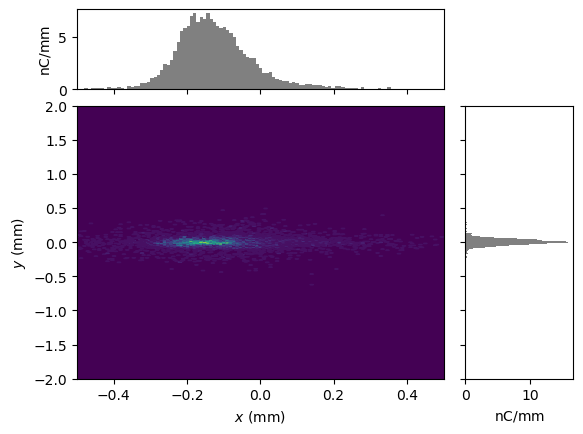

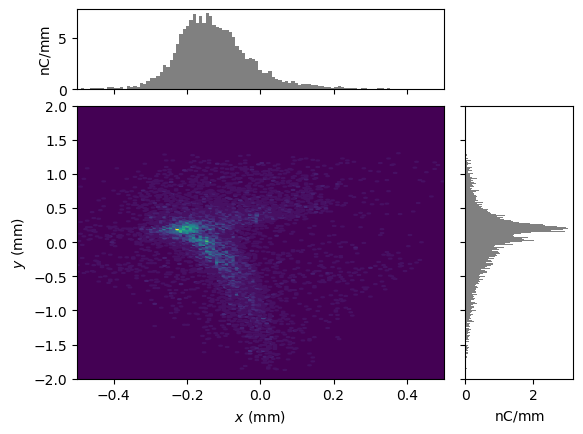

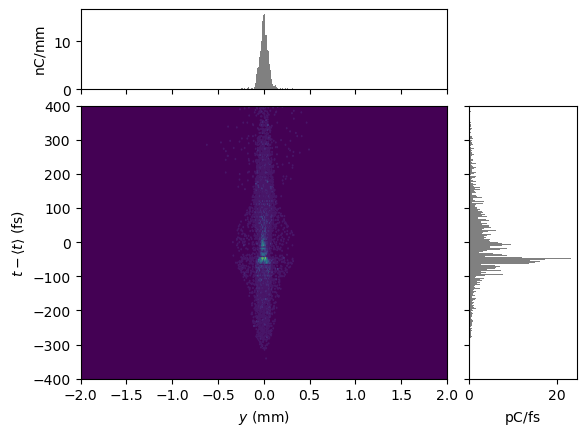

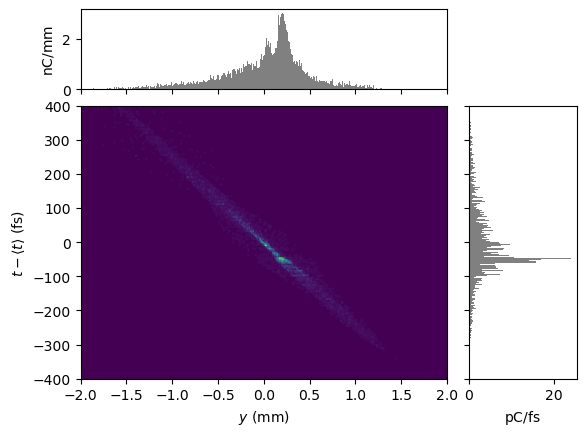

49.99754475375311
517.7786237936144
10.356081010452957


In [26]:
display(plotMod(POff, 'x', 'y', bins=300, xlim = (-0.5e-3, 0.5e-3), ylim = (-2e-3,  2e-3) ))
display(plotMod(POn, 'x', 'y', bins=300,  xlim = (-0.5e-3, 0.5e-3), ylim = (-2e-3,  2e-3)))

display(plotMod(POff, 'y', 'delta_t', bins=300, xlim = (-2e-3,  2e-3), ylim = (-400e-15, 400e-15) ))
display(plotMod(POn, 'y', 'delta_t',  bins=300, xlim = (-2e-3,  2e-3), ylim = (-400e-15, 400e-15) ))


plt.clf()

print(1e6 * smallestIntervalImpliedSigma(POff.y))
print(1e6 * smallestIntervalImpliedSigma(POn.y))
print(smallestIntervalImpliedSigma(POn.y) / smallestIntervalImpliedSigma(POff.y))

In [27]:
POn.charge

1.599360000000001e-09